In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


In [4]:
# load data set
df = pd.read_csv('/content/Mall_Customers.csv')
df.head(15)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Customer Segmentation (Clustering)**

In [9]:
# K-Means
from sklearn.cluster import KMeans



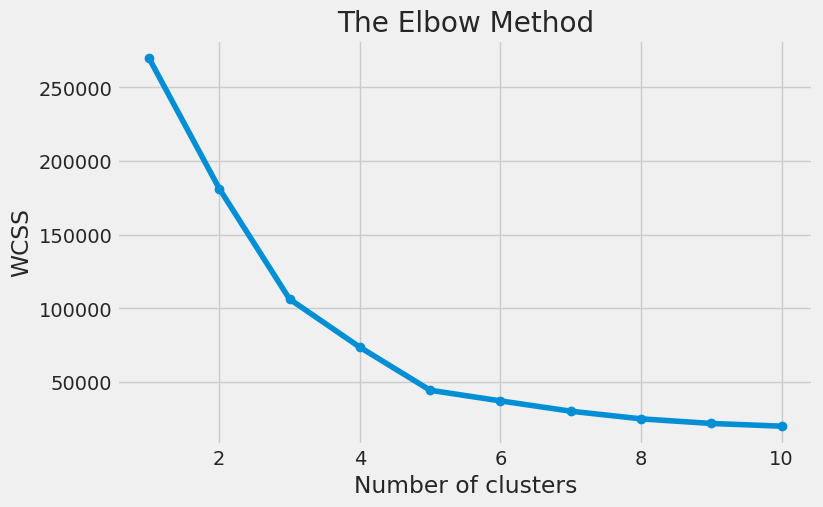

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results to observe the Elbow Point
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [12]:
# Apply KMeans with the optimal number of clusters (e.g., 5 from the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)





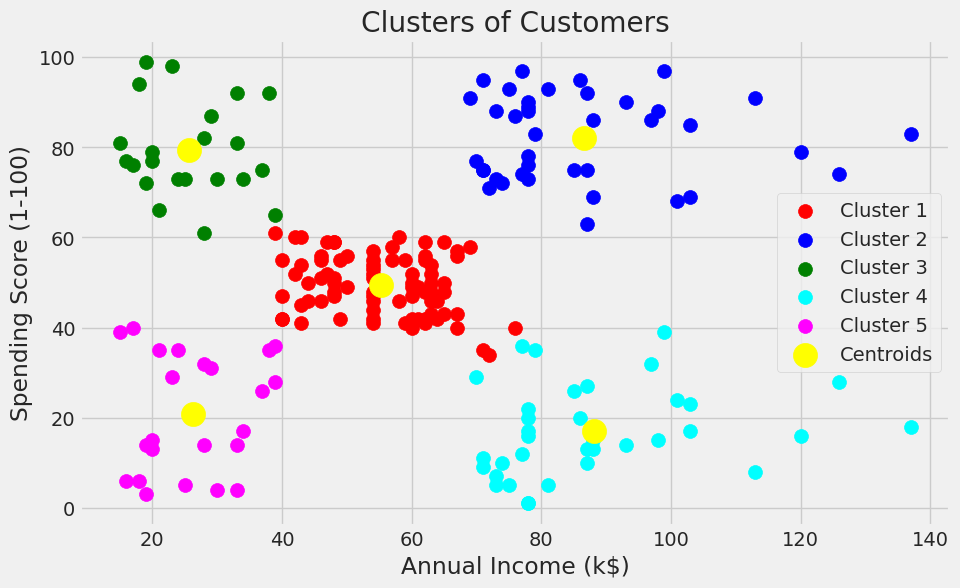

In [13]:
# Add cluster labels to the dataset
df['Cluster'] = y_kmeans


# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [15]:
# dbscan algorithym
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan.fit(X)




DBSCAN(eps=3, min_samples=4)

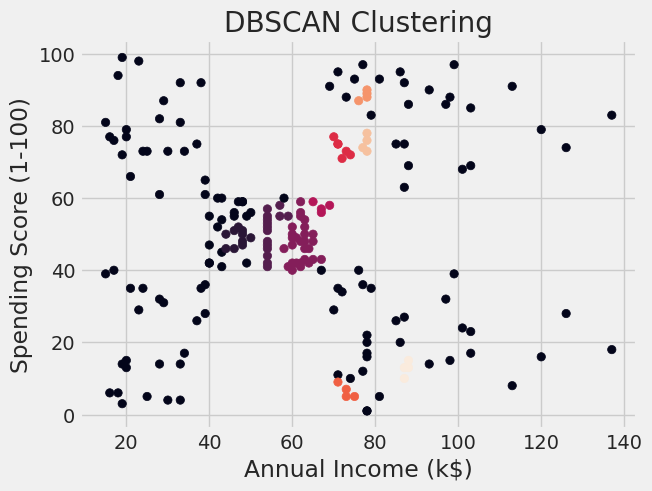

In [16]:
# plot
plt.scatter(X.values[:, 0], X.values[:, 1], c=dbscan.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

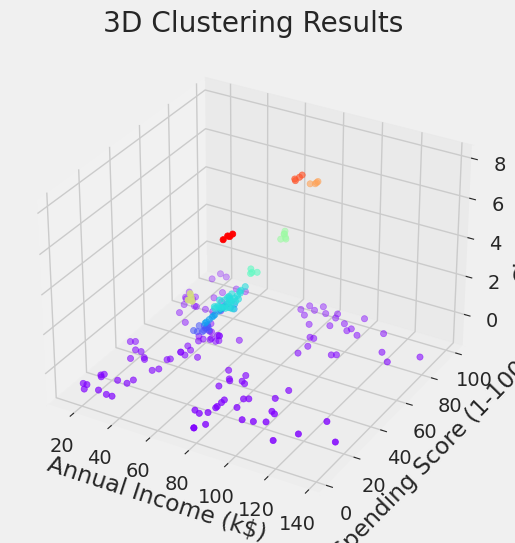

In [17]:
# 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           df['Cluster'], c=df['Cluster'], cmap='rainbow')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Cluster')
ax.set_title('3D Clustering Results')
plt.show()

# **Prediction Spending Score (Regression)**

In [19]:
# Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [22]:
# preprocess the data

# convert Gender to numerical values (male:0, Female:1)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


# Select features (Gender, Age, Annual Income) and target (Spending Score)
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [25]:
# Make predictions
y_pred = regressor.predict(X_test)


In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optional: Print model coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Mean Squared Error: 480.673141707248
R-squared: 0.025478181600745997
Coefficients: [-1.19846561 -0.58792363  0.05386299]
Intercept: 71.90498284889918


# **Customer Classification (Classification)**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
# Create a new column for classification based on Spending Score
df['Spending_Class'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])


In [30]:
# Select features (Gender, Age, Annual Income) and target (Spending_Category)
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending_Class']

In [31]:
# Train a Random Forest Classifier model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Make predictions
y_pred = classifier.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       2.0
          34       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00